In [ ]:
#Artificial Intelligence in the Stock Market
#Research Gap - Timing the Market


In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [2]:
#Load the training Dataset
dataset_train = pd.read_csv('/users/nis/Desktop/All/MachineLearning/SPY_t.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-25,43.96875,43.96875,43.75000,43.93750,25.334036,1003200
1,1993-02-01,43.96875,45.09375,43.96875,44.96875,25.928637,2234800
2,1993-02-08,44.96875,45.12500,44.53125,44.59375,25.712421,1159800
3,1993-02-15,44.46875,44.46875,42.81250,43.56250,25.117785,998700
4,1993-02-22,43.68750,44.43750,43.46875,44.40625,25.604307,1024300


In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [5]:
#Using the 'Close' collumn to train the model
training_set = dataset_train.iloc[:,4:5].values
print(training_set)
print(training_set.shape) #The .shape attribute returns the dimensions of the NumPy array as a tuple (number of rows, number of columns).

[[ 43.9375  ]
 [ 44.96875 ]
 [ 44.59375 ]
 ...
 [459.869995]
 [470.600006]
 [476.160004]]
(1510, 1)


In [6]:
#Normalize the Dataset
#Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. 
#To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[8.66856597e-04],
       [3.25071224e-03],
       [2.38385564e-03],
       ...,
       [9.62343729e-01],
       [9.87147411e-01],
       [1.00000000e+00]])

In [7]:
#Creating training variables
#input our data in the form of a 3D array to the LSTM model. 
#First,create data in 60 timesteps before using numpy to convert it into an array.
#Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [8]:
#Reshape the Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [9]:
#Importing Libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2022-11-28 17:59:11.059744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#Adding different layers to LSTM
#The LSTM layer is added with the following arguments: 50 units is the dimensionality of the output space,return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.
#Specifying 0.4 in the Dropout layer means that 40% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit.
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50))
model.add(Dropout(0.4))

model.add(Dense(units=1))

2022-11-28 18:00:20.585023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
#Fitting the Model
#To compile our model we use the Adam optimizer and set the loss as the mean_squared_error.
#After that, we fit the model to run for 10 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.
model.compile(optimizer='adam',loss='mean_squared_error')
hist = model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 54s 453ms/step - loss: 0.0064
Epoch 2/10
38/38 [==============================] - 21s 554ms/step - loss: 0.0019
Epoch 3/10
38/38 [==============================] - 21s 566ms/step - loss: 0.0015
Epoch 4/10
38/38 [==============================] - 25s 657ms/step - loss: 0.0015
Epoch 5/10
38/38 [==============================] - 25s 657ms/step - loss: 0.0012
Epoch 6/10
38/38 [==============================] - 23s 590ms/step - loss: 0.0012
Epoch 7/10
38/38 [==============================] - 25s 646ms/step - loss: 0.0011
Epoch 8/10
38/38 [==============================] - 23s 590ms/step - loss: 0.0010
Epoch 9/10
38/38 [==============================] - 22s 570ms/step - loss: 0.0011
Epoch 10/10
38/38 [==============================] - 24s 637ms/step - loss: 0.0011


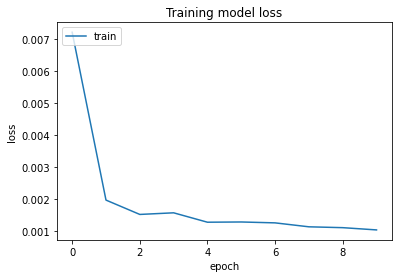

In [31]:
#Plotting Training Model Loss
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [32]:
#Extracting the Actual price
dataset_test = pd.read_csv('/users/nis/Desktop/All/MachineLearning/SPY.csv')
real_stock_price = dataset_test.iloc[:,4:5].values

In [33]:
#Preparing the input of the Model
#Before predicting future stock prices, we have to modify the test set(similar to the training set): merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data.
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,115):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
#Predicting the Values for the year 2022
#inverse_transform puts the stock prices in a normal readable format.
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

2/2 [==============================] - 2s 32ms/step


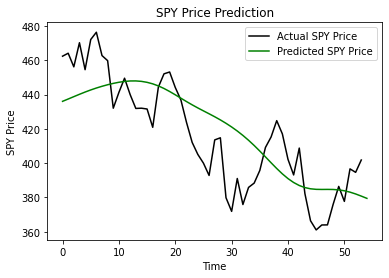

In [15]:
#Plotting Actual and Predicted Price
#use matplotlib to visualize the result of our predicted stock price and the actual stock price.
plt.plot(real_stock_price, color = 'black', label = 'Actual SPY Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SPY Price')
plt.title('SPY Price Prediction')
plt.xlabel('YTD')
plt.ylabel('SPY Price')
plt.legend()
plt.show()

In [ ]:
#Conclusion - Not possible to time the market